In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN

Using Theano backend.


In [2]:
df = pd.read_csv('data3.csv')

In [4]:
df.dtypes

Date       object
SP500     float64
IYF       float64
Open      float64
High      float64
Low       float64
Volume      int64
PRU       float64
dtype: object

In [5]:
df = df.fillna(method='ffill')

In [6]:
y = df['PRU']

In [7]:
x = df.drop(['Date', 'PRU'], axis=1)

In [8]:
x = x.apply(np.log)

In [9]:
scaler_x = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [10]:
x.head()

,SP500,IYF,Open,High,Low,Volume
0,3.105483,4.021057,4.068685,4.077198,4.051611,14.834935
1,3.107721,4.016743,4.056123,4.061649,4.048126,14.531397
2,3.113515,4.015662,4.054737,4.059926,4.048475,14.658714
3,3.110399,4.010419,4.041471,4.051437,4.034948,14.759611
4,3.106826,4.006788,4.051437,4.053175,4.040064,14.711354


In [11]:
x = np.array(x).reshape((len(x), 6))

In [12]:
x = scaler_x.fit_transform(x)

In [13]:
scaler_y = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [14]:
y = np.array(y).reshape((len(y), 1))

In [15]:
y = np.log(y)

In [16]:
y = scaler_y.fit_transform(y)

In [17]:
end = len(x) - 1

In [18]:
learn_end = int(end * 0.954)

In [19]:
x_train = x[0:learn_end-1,]

In [20]:
x_test = x[learn_end:end-1,]

In [21]:
y_train = y[1:learn_end]

In [22]:
y_test = y[learn_end+1:end]

In [23]:
x_train = x_train.reshape(x_train.shape + (1,))

In [24]:
x_test = x_test.reshape(x_test.shape + (1,))

In [25]:
seed=2016

In [26]:
np.random.seed(seed)

In [27]:
fit1 = Sequential()

In [28]:
fit1.add(SimpleRNN(units=8, activation='tanh', input_shape=(6, 1)))

In [29]:
fit1.add(Dense(units=1, activation='linear'))

In [30]:
sgd = SGD(lr=0.0001, momentum=0.9, nesterov=True)

In [31]:
fit1.compile(loss='mean_squared_error', optimizer=sgd)

In [32]:
fit1.fit(x_train, y_train, batch_size=10, epochs=1000)

Epoch 1/1000
1197/1197 [==============================] - 0s - loss: 0.0342     
Epoch 2/1000
1197/1197 [==============================] - 0s - loss: 0.0130     
Epoch 3/1000
1197/1197 [==============================] - 0s - loss: 0.0107     
Epoch 4/1000
1197/1197 [==============================] - 0s - loss: 0.0093     
Epoch 5/1000
1197/1197 [==============================] - 0s - loss: 0.0083     
Epoch 6/1000
1197/1197 [==============================] - 0s - loss: 0.0077     
Epoch 7/1000
1197/1197 [==============================] - 0s - loss: 0.0073     
Epoch 8/1000
1197/1197 [==============================] - 0s - loss: 0.0070     
Epoch 9/1000
1197/1197 [==============================] - 0s - loss: 0.0067     
Epoch 10/1000
1197/1197 [==============================] - 0s - loss: 0.0065     
Epoch 11/1000
1197/1197 [==============================] - 0s - loss: 0.0064     
Epoch 12/1000
1197/1197 [==============================] - 0s - loss: 0.0062     
Epoch 13/1000
1197/1197 [

1197/1197 [==============================] - 0s - loss: 0.0012     
Epoch 199/1000
1197/1197 [==============================] - 0s - loss: 0.0011     
Epoch 200/1000
1197/1197 [==============================] - 0s - loss: 0.0011     
Epoch 201/1000
1197/1197 [==============================] - 0s - loss: 0.0011     
Epoch 202/1000
1197/1197 [==============================] - 0s - loss: 0.0011       
Epoch 203/1000
1197/1197 [==============================] - 0s - loss: 0.0011       
Epoch 204/1000
1197/1197 [==============================] - 0s - loss: 0.0011     
Epoch 205/1000
1197/1197 [==============================] - 0s - loss: 0.0011       
Epoch 206/1000
1197/1197 [==============================] - 0s - loss: 0.0011       
Epoch 207/1000
1197/1197 [==============================] - 0s - loss: 0.0011       
Epoch 208/1000
1197/1197 [==============================] - 0s - loss: 0.0011       
Epoch 209/1000
1197/1197 [==============================] - 0s - loss: 0.0011     
Epoch 2

1197/1197 [==============================] - 0s - loss: 7.8262e-04     
Epoch 388/1000
1197/1197 [==============================] - 0s - loss: 7.8167e-04     
Epoch 389/1000
1197/1197 [==============================] - 0s - loss: 7.8086e-04     
Epoch 390/1000
1197/1197 [==============================] - 0s - loss: 7.8059e-04     
Epoch 391/1000
1197/1197 [==============================] - 0s - loss: 7.7904e-04     
Epoch 392/1000
1197/1197 [==============================] - 0s - loss: 7.8063e-04     
Epoch 393/1000
1197/1197 [==============================] - 0s - loss: 7.7746e-04     
Epoch 394/1000
1197/1197 [==============================] - 0s - loss: 7.7762e-04     
Epoch 395/1000
1197/1197 [==============================] - 0s - loss: 7.7834e-04     
Epoch 396/1000
1197/1197 [==============================] - 0s - loss: 7.7563e-04     
Epoch 397/1000
1197/1197 [==============================] - 0s - loss: 7.7585e-04     
Epoch 398/1000
1197/1197 [==============================] 

1197/1197 [==============================] - 0s - loss: 6.9442e-04     
Epoch 576/1000
1197/1197 [==============================] - 0s - loss: 6.9476e-04     
Epoch 577/1000
1197/1197 [==============================] - 0s - loss: 6.9411e-04     
Epoch 578/1000
1197/1197 [==============================] - 0s - loss: 6.9491e-04     
Epoch 579/1000
1197/1197 [==============================] - 0s - loss: 6.9440e-04     
Epoch 580/1000
1197/1197 [==============================] - 0s - loss: 6.9315e-04     
Epoch 581/1000
1197/1197 [==============================] - 0s - loss: 6.9419e-04     
Epoch 582/1000
1197/1197 [==============================] - 0s - loss: 6.9183e-04     
Epoch 583/1000
1197/1197 [==============================] - 0s - loss: 6.9071e-04     
Epoch 584/1000
1197/1197 [==============================] - 0s - loss: 6.9108e-04     
Epoch 585/1000
1197/1197 [==============================] - 0s - loss: 6.9284e-04     
Epoch 586/1000
1197/1197 [==============================] 

1197/1197 [==============================] - 0s - loss: 6.4851e-04     
Epoch 764/1000
1197/1197 [==============================] - 0s - loss: 6.4840e-04     
Epoch 765/1000
1197/1197 [==============================] - 0s - loss: 6.4985e-04     
Epoch 766/1000
1197/1197 [==============================] - 0s - loss: 6.4888e-04     
Epoch 767/1000
1197/1197 [==============================] - 0s - loss: 6.4906e-04     
Epoch 768/1000
1197/1197 [==============================] - 0s - loss: 6.4952e-04     
Epoch 769/1000
1197/1197 [==============================] - 0s - loss: 6.4757e-04     
Epoch 770/1000
1197/1197 [==============================] - 0s - loss: 6.4770e-04     
Epoch 771/1000
1197/1197 [==============================] - 0s - loss: 6.4927e-04     
Epoch 772/1000
1197/1197 [==============================] - 0s - loss: 6.4699e-04     
Epoch 773/1000
1197/1197 [==============================] - 0s - loss: 6.4820e-04     
Epoch 774/1000
1197/1197 [==============================] 

1197/1197 [==============================] - 0s - loss: 6.1738e-04     
Epoch 952/1000
1197/1197 [==============================] - 0s - loss: 6.1796e-04     
Epoch 953/1000
1197/1197 [==============================] - 0s - loss: 6.1923e-04     
Epoch 954/1000
1197/1197 [==============================] - 0s - loss: 6.1765e-04     
Epoch 955/1000
1197/1197 [==============================] - 0s - loss: 6.1935e-04     
Epoch 956/1000
1197/1197 [==============================] - 0s - loss: 6.1772e-04     
Epoch 957/1000
1197/1197 [==============================] - 0s - loss: 6.1840e-04     
Epoch 958/1000
1197/1197 [==============================] - 0s - loss: 6.1718e-04     
Epoch 959/1000
1197/1197 [==============================] - 0s - loss: 6.1741e-04     
Epoch 960/1000
1197/1197 [==============================] - 0s - loss: 6.1707e-04     
Epoch 961/1000
1197/1197 [==============================] - 0s - loss: 6.1697e-04     
Epoch 962/1000
1197/1197 [==============================] 

In [33]:
score_train = fit1.evaluate(x_train, y_train, batch_size=10)

  10/1197 [..............................] - ETA: 0s

In [34]:
score_test = fit1.evaluate(x_test, y_test, batch_size=10)

10/57 [====>.........................] - ETA: 0s

In [35]:
np.round(score_train, 6)

0.000611

In [36]:
np.round(score_test, 6)

0.00042499999999999998

In [37]:
pred1 = fit1.predict(x_test)

In [38]:
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

In [39]:
pred1 = np.exp(pred1)

In [40]:
pred1 = np.round(pred1, 2)

In [41]:
df.head()

,Date,SP500,IYF,Open,High,Low,Volume,PRU
0,2012-09-17,22.32,55.76,58.48,58.98,57.49,2771600,49.07
1,2012-09-18,22.37,55.52,57.75,58.07,57.29,2046000,48.62
2,2012-09-19,22.50,55.46,57.67,57.97,57.31,2323800,48.62
3,2012-09-20,22.43,55.17,56.91,57.48,56.54,2570500,48.21
4,2012-09-21,22.35,54.97,57.48,57.58,56.83,2449400,48.13


In [42]:
df2 = df.drop(['SP500', 'IYF', 'Open', 'High', 'Low', 'Volume'], axis=1)

In [43]:
pred1 = np.ndarray.flatten(pred1)

In [44]:
pred1 = pd.Series(pred1)

In [45]:
df2['prediction'] = np.nan

In [46]:
len(df2)

1257

In [47]:
len(pred1)

57

In [48]:
df2['prediction'][1200:] = pred1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df2.tail()

,Date,PRU,prediction
1252,2017-09-08,98.91,100.190002
1253,2017-09-11,100.93,98.900002
1254,2017-09-12,102.18,98.540001
1255,2017-09-13,102.36,100.070000
1256,2017-09-14,101.97,101.250000


In [50]:
df2 = df2.set_index('Date')

In [51]:
df2.plot(figsize=(10,10))

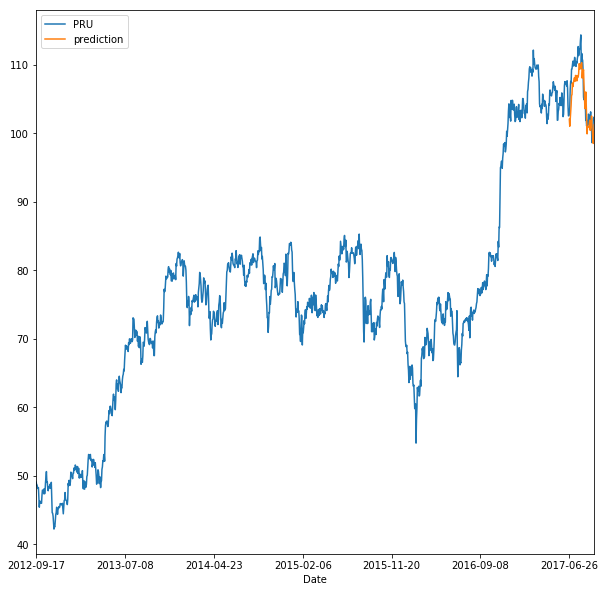

In [52]:
plt.show()